<a href="https://colab.research.google.com/github/JF11579/Adelphi/blob/main/Sprint_5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This one uses just 5 features

# Steps


1.   Subest Data
2.   Run Lasso on the Orig Data 
      Change split 3 times and change Alpha 3 x
3.  Now try adjusted data
      plug in Avg April sales
4.  Lastly use augmented data.



# Libraries

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from matplotlib import pyplot
import seaborn as sns
import pandas
from sklearn.model_selection import train_test_split #Split data in testing and training

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
import urllib

import datetime as dt
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


# evaluate an lasso regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import arange

from yellowbrick.features import ParallelCoordinates
# use automatically configured the lasso regression algorithm
from sklearn.linear_model import LassoCV
import plotly.express as px
from sklearn import metrics
import urllib
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression

# Juans code and Metrics

Create Prediction Plots

In [3]:
def Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test):
    fig, ax = plt.subplots(ncols=2, figsize=(10,4))

    ax[0].scatter(y_train, y_pred_Train)
    ax[0].set_ylim(0,3)
    ax[0].set_xlim(0,3)
    ax[0].grid()
    ax[0].set_xlabel('y')
    ax[0].set_ylabel('yhat')
    ax[0].set_title('Training Set')


    ax[1].scatter(y_test, y_pred_Test)
    ax[1].set_ylim(0,3)
    ax[1].set_xlim(0,3)
    ax[1].grid()
    ax[1].set_xlabel('y')
    ax[1].set_ylabel('yhat')
    ax[1].set_title('Testing Set')
    plt.show()
    return()

Print Metrics

In [4]:
def Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test):
    print('Training Metrics:')
    print('R squared:', metrics.r2_score(y_train, y_pred_Train))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_Train))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_Train))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_Train)))

    print('\nTesting Metrics:')
    print('R squared:', metrics.r2_score(y_test, y_pred_Test))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_Test))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_Test))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Test)))
    
    return()

Plot Box Plots

In [5]:
def Multiple_Runner(model, X, y):
    
    Train_MSE = [] #Empty list to Store MSEs for training data set
    Test_MSE = []  #Empty list to Store MSEs for testing data set

    Train_R2 = [] #Empty list to Store R2s for training data set
    Test_R2 = []  #Empty list to Store R2s for testing data set

    for i in range(1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
        model.fit(X_train, y_train) #Train the model
    
        y_pred_Train  = model.predict(X_train)  #Predictions on training model
        y_pred_Test   = model.predict(X_test)   #Predictions on testing model
    
        train_R2 = metrics.r2_score(y_train, y_pred_Train) #Obtaining the metrics
        test_R2  = metrics.r2_score(y_test, y_pred_Test)
    
        train_MSE = metrics.mean_squared_error(y_train, y_pred_Train)
        test_MSE  = metrics.mean_squared_error(y_test, y_pred_Test)
    
        Train_MSE.append(train_MSE) #Storing the metrics in the lists
        Test_MSE.append(test_MSE) 
    
        Train_R2.append(train_R2) #Storing the metrics in the lists
        Test_R2.append(test_R2)  
    
    print('Train MSE median:', np.median(Train_MSE))
    print('Test MSE median:', np.median(Test_MSE))

    print('\nTrain_R2 median:', np.median(Train_R2))
    print('Test_R2 median:', np.median(Test_R2))

    fig, ax = plt.subplots(ncols=2, figsize=(10,4))

    ax[0].boxplot([Train_MSE, Test_MSE])
    ax[0].set_xticks([1,2],minor = False)                   #setting boxplot names
    ax[0].set_xticklabels(['Train','Test'], minor = False)  #setting boxplot names
    ax[0].grid()
    ax[0].set_title('Mean Squared Error')

    ax[1].boxplot([Train_R2, Test_R2])
    ax[1].set_xticks([1,2],minor = False)
    ax[1].set_xticklabels(['Train','Test'], minor = False)
    ax[1].grid()
    ax[1].set_title('R squared')

    plt.show()
    

#Data

In [6]:
data= pd.read_csv('/content/Porcelana_OP_adelphi_2021_SCALED.csv')
data.head(5)

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,9.131904e+05,194276.0200,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.5680,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,...,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.500,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25
1,2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1.007968e+06,228359.8390,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.5680,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,...,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24
2,2017-03-01,-1.346258,-0.267695,114667.2587,15231.0,1438528.0,5687.0,9544.0,354904.0,1083624.0,1099919.669,1.083268e+06,241130.4555,568447.4880,218640.3600,55049.9274,0.0665,14753.34784,206242.5680,4.69,2943.49,50.43,50.60,102.162670,-21.1,-18.3,-25.4,9.704610,1.215372e+11,9.821204e+10,1.191497e+11,9.035507e+10,9.516119e+10,1.388751e+11,5.266968e+10,1.137228e+11,2.872364e+10,2.258877e+10,1.192185e+11,1.000214e+12,...,4119152.514,6258157.459,3447128.397,478975.7922,1302860.802,5430241.566,555441.9044,7916686.911,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.

In [7]:
data['date'] = pd.to_datetime(data['date'])
data['date']= data['date'].map(dt.datetime.toordinal)

In [8]:
data = data[['date' ,'Quantity', 'Seasonal', 'Gray_cement_dispatch_comercial', 'ISE',
       'Construction_lic_area/unt_SIlag_4', ]]

In [9]:
data.shape

(54, 6)

In [10]:
y = data['Quantity']
X = data.loc[: ,data.columns != 'Quantity']

In [11]:
cols =data.columns.difference(['date'])

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

We dont scale the date col here 

In [13]:
data[cols] = sc.fit_transform(data[cols])

In [14]:
data.head(3)

,date,Quantity,Seasonal,Gray_cement_dispatch_comercial,ISE,Construction_lic_area/unt_SIlag_4
0,736330,1.539880,0.703768,-0.536381,-0.687592,1.924774
1,736361,0.110421,0.325418,-0.137113,-0.608165,-0.287215
2,736389,-1.314169,-0.250193,0.385513,-0.770505,-1.573761


In [15]:
data.shape

(54, 6)

### save data to csv

In [136]:
data.to_csv('data_Processed.csv')

# Regress on subsetted data

## LassoCV. 1

#### Training and splitting

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)

(37, 5)
(17, 5)


### Model Creation

https://stackoverflow.com/questions/57205585/how-does-parameter-selection-work-in-lassocv-when-nothing-is-supplied

In [17]:
# TOL tells LAsso when to stop searching for some min 
# value .  

# The default is 1 / 10,ooo.
# Ours ran on any # greater thna tha
#tols = [0.0001 #, 0.001, 0.01, 0.1, 1]
LassoReg = LassoCV(cv = 37, random_state=1, tol = 0.01, n_alphas=5).fit(X, y) # CV = X split

## Alpha score  of 5 , chose 0.001

In [18]:
LassoReg.alphas_[4]/LassoReg.alphas_[0]

0.001

### Parameter settings

In [19]:
LassoReg.score

<bound method RegressorMixin.score of LassoCV(cv=37, n_alphas=5, random_state=1, tol=0.01)>

In [20]:
LassoReg.score(X,y)

0.5832049683775525

In [21]:
y_pred_Train = LassoReg .predict(X_train) #Predictions on training model
y_pred_Test  = LassoReg .predict(X_test)  #Predictions on testing model

print('Intercept:',LassoReg .intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LassoReg .coef_)

Intercept: -5.703990007706598
Coefficients: [0.00000000e+00 0.00000000e+00 1.05493421e-05 0.00000000e+00
 0.00000000e+00]


### Model Details

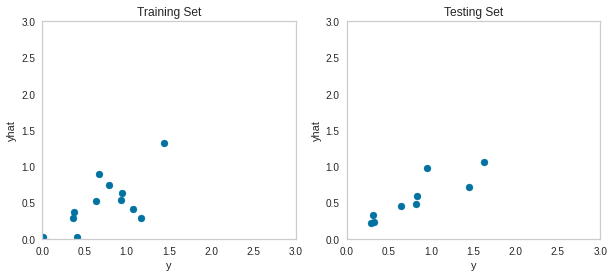

Training Metrics:
R squared: 0.582970545667854
Mean Absolute Error: 0.5014009034461974
Mean Squared Error: 0.40300939654576085
Root Mean Squared Error: 0.6348302108010935

Testing Metrics:
R squared: 0.5785241642076264
Mean Absolute Error: 0.4715011583621411
Mean Squared Error: 0.44679906090700083
Root Mean Squared Error: 0.6684302962216785


()

In [22]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

### Multiple Run Analysis

Train MSE median: 0.4227749735275116
Test MSE median: 0.4266993843174935

Train_R2 median: 0.5974070124252964
Test_R2 median: 0.40772995473315476


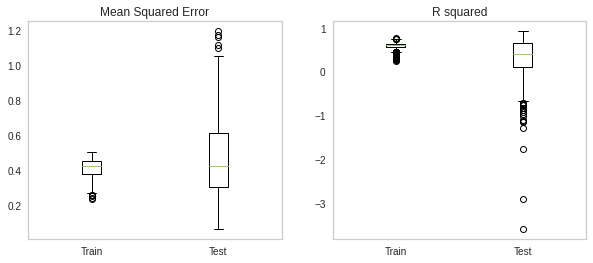

In [23]:
Multiple_Runner(LassoReg, X, y)


# Orig Data split o.5. 2

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5)
print(X_train.shape)
print(X_test.shape)

(27, 5)
(27, 5)


In [25]:
# CV = X split
#LassoReg = LassoCV(cv = 27, random_state=1, tol =1).fit(X, y) 
LassoReg = LassoCV(cv = 37, random_state=1, tol = 0.01, n_alphas=5).fit(X, y) # CV = X split

In [26]:
LassoReg.alphas_[4]/LassoReg.alphas_[0]

0.001

In [27]:
LassoReg.score(X,y)

0.5832049683775525

In [28]:
y_pred_Train = LassoReg .predict(X_train) #Predictions on training model
y_pred_Test  = LassoReg .predict(X_test)  #Predictions on testing model

print('Intercept:',LassoReg .intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LassoReg .coef_)

Intercept: -5.703990007706598
Coefficients: [0.00000000e+00 0.00000000e+00 1.05493421e-05 0.00000000e+00
 0.00000000e+00]


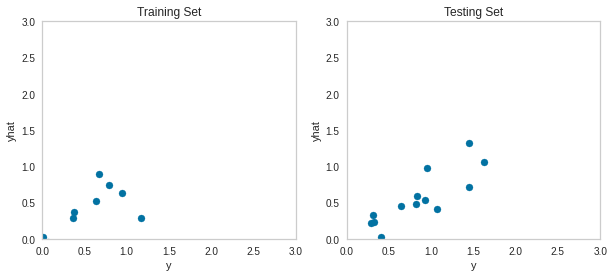

Training Metrics:
R squared: 0.6740070344377518
Mean Absolute Error: 0.4496637513753671
Mean Squared Error: 0.3140081033702132
Root Mean Squared Error: 0.5603642595403575

Testing Metrics:
R squared: 0.46262295858380487
Mean Absolute Error: 0.5343122900937327
Mean Squared Error: 0.5195819598746819
Root Mean Squared Error: 0.7208203381389027


()

In [29]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

Train MSE median: 0.4201534688665392
Test MSE median: 0.426675661722106

Train_R2 median: 0.5968836708807311
Test_R2 median: 0.41221074283241715


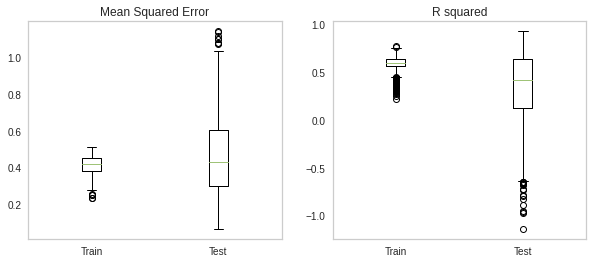

In [30]:
Multiple_Runner(LassoReg, X, y)

## Orig Data 0.3   TOL = 0.1

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)

(37, 5)
(17, 5)


In [32]:
# CV = X train split
#LassoReg = LassoCV(cv = 16, random_state=1, tol =1).fit(X, y) 
# CV = X split
#LassoReg = LassoCV(cv = 27, random_state=1, tol =1).fit(X, y) 
LassoReg = LassoCV(cv = 43, random_state=1, tol = 0.1, n_alphas=5).fit(X, y) # CV = X split
LassoReg.alphas_[4]/LassoReg.alphas_[0]

0.001

In [33]:
LassoReg.score(X,y)

0.5832049683775525

In [34]:
y_pred_Train = LassoReg .predict(X_train) #Predictions on training model
y_pred_Test  = LassoReg .predict(X_test)  #Predictions on testing model

print('Intercept:',LassoReg .intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LassoReg .coef_)

Intercept: -5.703990007706598
Coefficients: [0.00000000e+00 0.00000000e+00 1.05493421e-05 0.00000000e+00
 0.00000000e+00]


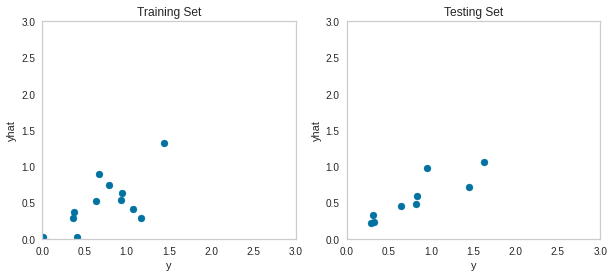

Training Metrics:
R squared: 0.582970545667854
Mean Absolute Error: 0.5014009034461974
Mean Squared Error: 0.40300939654576085
Root Mean Squared Error: 0.6348302108010935

Testing Metrics:
R squared: 0.5785241642076264
Mean Absolute Error: 0.4715011583621411
Mean Squared Error: 0.44679906090700083
Root Mean Squared Error: 0.6684302962216785


()

In [35]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

Train MSE median: 0.41960534857858034
Test MSE median: 0.425198834663027

Train_R2 median: 0.5968215658452602
Test_R2 median: 0.4260002777588771


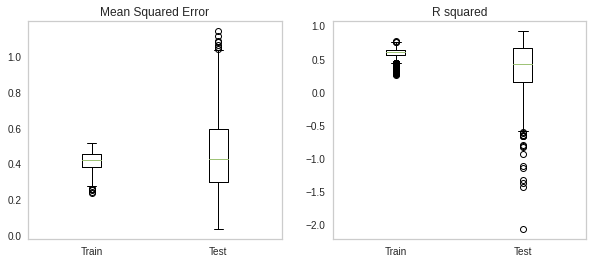

In [36]:
Multiple_Runner(LassoReg, X, y)

# Split 0.5, TOL = 0.1

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
print(X_train.shape)
print(X_test.shape)

(27, 5)
(27, 5)


In [38]:
# CV = X train split
#LassoReg = LassoCV(cv = 37, random_state=1, tol =0.1).fit(X, y) 
LassoReg = LassoCV(cv = 43, random_state=1, tol = 0.1, n_alphas=5).fit(X, y) # CV = X split
LassoReg.alphas_[4]/LassoReg.alphas_[0]

0.001

In [39]:
LassoReg.alphas_[4]/LassoReg.alphas_[0]

0.001

In [40]:
LassoReg.score(X,y)

0.5832049683775525

In [41]:
y_pred_Train = LassoReg .predict(X_train) #Predictions on training model
y_pred_Test  = LassoReg .predict(X_test)  #Predictions on testing model

print('Intercept:',LassoReg .intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LassoReg .coef_)

Intercept: -5.703990007706598
Coefficients: [0.00000000e+00 0.00000000e+00 1.05493421e-05 0.00000000e+00
 0.00000000e+00]


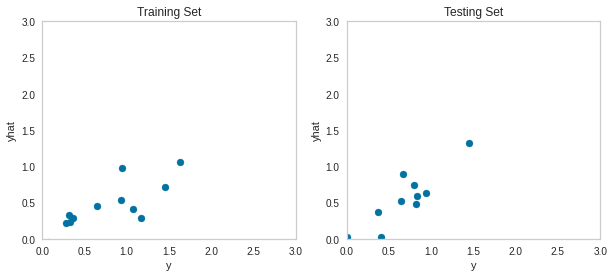

Training Metrics:
R squared: 0.4559567171095723
Mean Absolute Error: 0.5305609757154071
Mean Squared Error: 0.43544348251281956
Root Mean Squared Error: 0.659881415492829

Testing Metrics:
R squared: 0.667103120875254
Mean Absolute Error: 0.45341506575369267
Mean Squared Error: 0.39814658073207554
Root Mean Squared Error: 0.6309885741691964


()

In [42]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

Train MSE median: 0.4180254187047732
Test MSE median: 0.44182156037646747

Train_R2 median: 0.5969472800583518
Test_R2 median: 0.4326541387208299


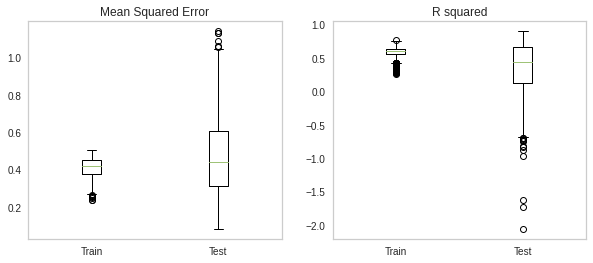

In [43]:
Multiple_Runner(LassoReg, X, y)

# Split 3% , tol = 0.1


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)

(37, 5)
(17, 5)


In [45]:
# CV = X train split
LassoReg = LassoCV(cv = 37, random_state=1, tol =0.1).fit(X, y) 

In [46]:
LassoReg.score(X,y)

0.5832223923217288

In [47]:
y_pred_Train = LassoReg .predict(X_train) #Predictions on training model
y_pred_Test  = LassoReg .predict(X_test)  #Predictions on testing model

print('Intercept:',LassoReg .intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LassoReg .coef_)

Intercept: -5.72866431543208
Coefficients: [0.00000000e+00 0.00000000e+00 1.05949764e-05 0.00000000e+00
 0.00000000e+00]


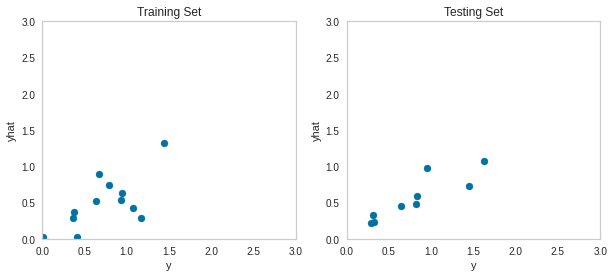

Training Metrics:
R squared: 0.5824728278011303
Mean Absolute Error: 0.5012362751340641
Mean Squared Error: 0.40349038170168844
Root Mean Squared Error: 0.6352089275991707

Testing Metrics:
R squared: 0.5795638917101824
Mean Absolute Error: 0.470376158755586
Mean Squared Error: 0.4456968642155396
Root Mean Squared Error: 0.6676053206914544


()

In [48]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

Train MSE median: 0.41825343636793066
Test MSE median: 0.4404327710683996

Train_R2 median: 0.600498579478989
Test_R2 median: 0.4179755834877121


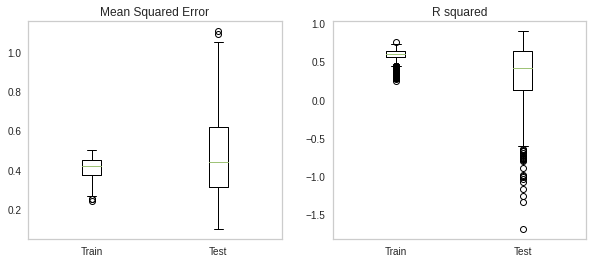

In [49]:
Multiple_Runner(LassoReg, X, y)

## Get predicted data to plot

In [ ]:
# Make predictions using the testing set
#diabetes_y_pred = regr.predict(diabetes_X_test)
qty_prediction = LassoReg.predict

# ADJUSTED  

Substitute Qty split o.3  TOL o.01


In [50]:
ADJUSTED_data = pd.read_csv('/content/Porcelana_OP_adelphi_2021_SCALED.csv')
ADJUSTED_data.head(2)

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,913190.407,194276.020,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.568,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,...,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.00,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.5,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25
1,2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1007968.299,228359.839,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.568,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,...,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.56,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.9,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24


In [51]:
#Add new variable for ADJUSTED  Quantity
#This is the avg of previous Aprils

ADJUSTED_data["Quantity_adj"] = ADJUSTED_data['Quantity']
ADJUSTED_data.at[39,'Quantity_adj'] =  -1.303515
# Next drop the original Qunatity column
ADJUSTED_data.drop(columns='Quantity')

,date,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,Construction_lic_area/unt,...,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day,Quantity_adj
0,2017-01-01,0.699923,112579.429700,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,8.970635e+05,9.131904e+05,194276.020000,502084.833000,171559.966500,45269.587500,0.0694,14753.347840,206242.568000,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,104.851013,...,6.402426e+06,3.390803e+06,550883.07390,1.302565e+06,4.680431e+06,460632.00000,5.702443e+06,4.657354e+06,7.012296e+06,3.283417e+06,549789.00000,1.454672e+06,4.941982e+06,531850.19260,7.315236e+06,6.120086e+06,8.140200e+06,3.814229e+06,632387.59210,1.627959e+06,4.068021e+06,438682.26790,6.513619e+06,6.137144e+06,6.675101e+06,2.989981e+06,483448.34730,1.298812e+06,3.106784e+06,386289.55250,4.875376e+06,4.791147e+06,5.996089e+06,3.013613e+06,470541.32900,1.093819e+06,1,5,25,1.503548
1,2017-02-01,0.316156,113438.094900,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1.025705e+06,1.007968e+06,228359.839000,530826.162500,199731.695000,49050.602500,0.0678,14753.347840,206242.568000,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,98.287453,...,7.930536e+06,4.347165e+06,677598.18360,1.864167e+06,4.353892e+06,433679.77720,5.854576e+06,4.445891e+06,6.402426e+06,3.390803e+06,550883.07390,1.302565e+06,4.680431e+06,460632.00000,5.702443e+06,4.657354e+06,7.012296e+06,3.283417e+06,549789.00000,1.454672e+06,4.941982e+06,531850.19260,7.315236e+06,6.120086e+06,8.140200e+06,3.814229e+06,632387.59210,1.627959e+06,4.068021e+06,438682.26790,6.513619e+06,6.137144e+06,6.675101e+06,2.989981e+06,483448.34730,1.298812e+06,0,4,24,0.076213
2,2017-03-01,-0.267695,114667.258700,15231.0,1438528.0,5687.0,9544.0,354904.0,1083624.0,1.099920e+06,1.083268e+06,241130.455500,568447.488000,218640.360000,55049.927400,0.0665,14753.347840,206242.568000,4.69,2943.49,50.43,50.60,102.162670,-21.1,-18.3,-25.4,9.704610,1.215372e+11,9.821204e+10,1.191497e+11,9.035507e+10,9.516119e+10,1.388751e+11,5.266968e+10,1.137228e+11,2.872364e+10,2.258877e+10,1.192185e+11,1.000214e+12,94.447377,...,6.258157e+06,3.447128e+06,478975.79220,1.302861e+06,5.430242e+06,555441.90440,7.916687e+06,6.566090e+06,7.930536e+06,4.347165e+06,677598.18360,1.864167e+06,4.353892e+06,433679.77720,5.854576e+06,4.445891e+06,6.402426e+06,3.390803e+06,550883.07390,1.302565e+06,4.680431e+06,46

In [52]:
ADJUSTED_data['date'] = pd.to_datetime(ADJUSTED_data['date'])
ADJUSTED_data['date']= ADJUSTED_data['date'].map(dt.datetime.toordinal)

In [53]:
ADJUSTED_data = ADJUSTED_data[['date' ,'Quantity', 'Seasonal', 'Gray_cement_dispatch_comercial', 'ISE',
       'Construction_lic_area/unt_SIlag_4', ]]

In [54]:
y = data['Quantity']
X = data.loc[: ,data.columns != 'Quantity']

In [55]:
cols =data.columns.difference(['date'])

In [56]:
#This is the avg of previous Aprils

ADJUSTED_data["Quantity_adj"] = ADJUSTED_data['Quantity']
ADJUSTED_data.at[39,'Quantity_adj'] =  -1.303515
# Next drop the original Qunatity column
ADJUSTED_data.drop(columns='Quantity')

,date,Seasonal,Gray_cement_dispatch_comercial,ISE,Construction_lic_area/unt_SIlag_4,Quantity_adj
0,736330,0.699923,502084.833000,102.548972,69.107759,1.503548
1,736361,0.316156,530826.162500,102.919033,61.576356,0.076213
2,736389,-0.267695,568447.488000,102.162670,57.195909,-1.346258
3,736420,-2.419870,477863.756500,102.983586,60.038831,-2.122585
4,736450,-0.644222,521968.220000,103.070062,63.974909,-0.665067
5,736481,-0.938441,510880.730500,104.618991,58.587894,-1.108998
6,736511,0.649509,562575.782000,103.420167,62.406190,0.294088
7,736542,0.102205,540050.747000,103.913509,67.679245,-0.654309
8,736573,0.483263,534357.191000,103.760403,67.535316,-0.880117
9,736603,1.246427,542529.495500,103.870153,60.124903,-0.029225


In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [58]:
ADJUSTED_data[cols] = sc.fit_transform(ADJUSTED_data[cols])

In [59]:
ADJUSTED_data.shape

(54, 7)

In [60]:
ADJUSTED_data.head()

,date,Quantity,Seasonal,Gray_cement_dispatch_comercial,ISE,Construction_lic_area/unt_SIlag_4,Quantity_adj
0,736330,1.539880,0.703768,-0.536381,-0.687592,1.924774,1.503548
1,736361,0.110421,0.325418,-0.137113,-0.608165,-0.287215,0.076213
2,736389,-1.314169,-0.250193,0.385513,-0.770505,-1.573761,-1.346258
3,736420,-2.091651,-2.371991,-0.872854,-0.594309,-0.738789,-2.122585
4,736450,-0.631964,-0.621405,-0.260166,-0.575749,0.417245,-0.665067


In [154]:
# Export ADJUSTED DATA for plotting

ADJUSTED_data.to_csv('ADJUSTED_data.csv')

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)

(37, 5)
(17, 5)


In [62]:
# CV = X train split
#LassoReg = LassoCV(cv = 16, random_state=1, tol =1).fit(X, y) 
# CV = X split
#LassoReg = LassoCV(cv = 27, random_state=1, tol =1).fit(X, y) 
LassoReg = LassoCV(cv = 43, random_state=1, tol = 0.01, n_alphas=5).fit(X, y) # CV = X split
LassoReg.alphas_[4]/LassoReg.alphas_[0]

0.0010000000000000002

In [63]:
LassoReg.score(X,y)

0.7420451617447861

In [64]:
y_pred_Train = LassoReg .predict(X_train) #Predictions on training model
y_pred_Test  = LassoReg .predict(X_test)  #Predictions on testing model

print('Intercept:',LassoReg .intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LassoReg .coef_)

Intercept: -214.97435702259224
Coefficients: [2.91634776e-04 2.39157849e-01 3.32867493e-01 2.71058714e-01
 8.69805059e-02]


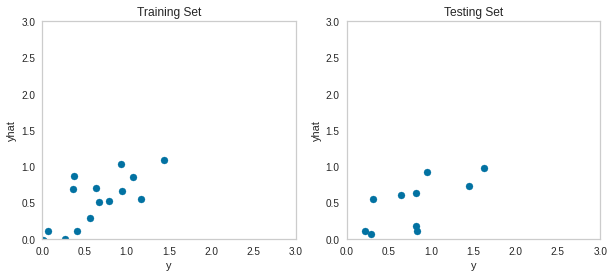

Training Metrics:
R squared: 0.7133541013210206
Mean Absolute Error: 0.4018999030349546
Mean Squared Error: 0.27700918831724847
Root Mean Squared Error: 0.5263166236375671

Testing Metrics:
R squared: 0.7957860330080396
Mean Absolute Error: 0.37378547290501224
Mean Squared Error: 0.2164836057672566
Root Mean Squared Error: 0.46527798762380385


()

In [65]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

Train MSE median: 0.2562017973950006
Test MSE median: 0.3150614559741227

Train_R2 median: 0.7604957089390392
Test_R2 median: 0.540349585036769


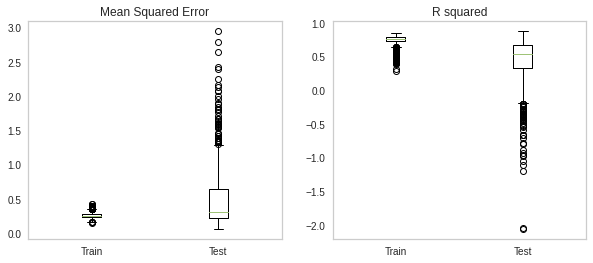

In [66]:
Multiple_Runner(LassoReg, X, y)

### adj data , split o.5 TOL 0.01

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5)
print(X_train.shape)
print(X_test.shape)

(27, 5)
(27, 5)


In [68]:
# CV = X train split
#LassoReg = LassoCV(cv = 16, random_state=1, tol =1).fit(X, y) 
# CV = X split
#LassoReg = LassoCV(cv = 27, random_state=1, tol =1).fit(X, y) 
LassoReg = LassoCV(cv = 43, random_state=1, tol = 0.01, n_alphas=5).fit(X, y) # CV = X split
LassoReg.alphas_[4]/LassoReg.alphas_[0]

0.0010000000000000002

In [69]:
LassoReg.score(X,y)

0.7420451617447861

In [70]:
y_pred_Train = LassoReg .predict(X_train) #Predictions on training model
y_pred_Test  = LassoReg .predict(X_test)  #Predictions on testing model

print('Intercept:',LassoReg .intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LassoReg .coef_)

Intercept: -214.97435702259224
Coefficients: [2.91634776e-04 2.39157849e-01 3.32867493e-01 2.71058714e-01
 8.69805059e-02]


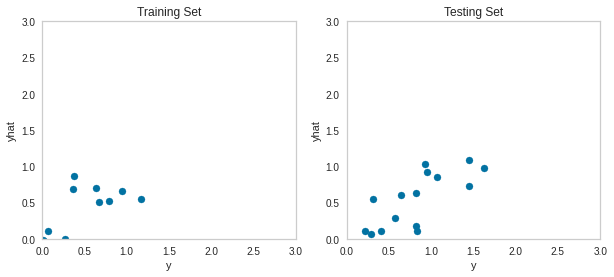

Training Metrics:
R squared: 0.756812757301867
Mean Absolute Error: 0.4043408979406897
Mean Squared Error: 0.23424666453083642
Root Mean Squared Error: 0.48399035582420075

Testing Metrics:
R squared: 0.7086903554340617
Mean Absolute Error: 0.3817572298992558
Mean Squared Error: 0.28166301197959154
Root Mean Squared Error: 0.5307193344693516


()

In [71]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

Train MSE median: 0.2540816326999235
Test MSE median: 0.307281266098846

Train_R2 median: 0.7630761644206203
Test_R2 median: 0.5337195835069007


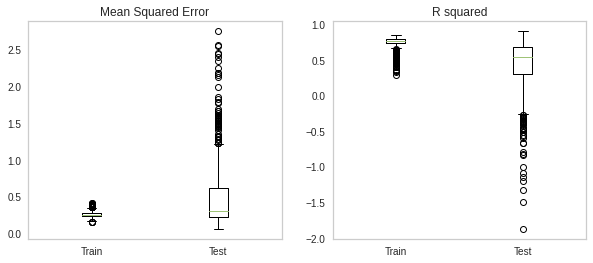

In [72]:
Multiple_Runner(LassoReg, X, y)

# Adjusted Data. Split = 0.3 | TOL 0.1

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)

(37, 5)
(17, 5)


In [74]:
# CV = X train split
#LassoReg = LassoCV(cv = 16, random_state=1, tol =1).fit(X, y) 
# CV = X split
#LassoReg = LassoCV(cv = 27, random_state=1, tol =1).fit(X, y) 
LassoReg = LassoCV(cv = 43, random_state=1, tol = 0.1, n_alphas=5).fit(X, y) # CV = X split
LassoReg.alphas_[4]/LassoReg.alphas_[0]

0.0010000000000000002

In [75]:
LassoReg.score(X,y)

0.7420221315056837

In [76]:
y_pred_Train = LassoReg .predict(X_train) #Predictions on training model
y_pred_Test  = LassoReg .predict(X_test)  #Predictions on testing model

print('Intercept:',LassoReg .intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LassoReg .coef_)

Intercept: -214.4416518307065
Coefficients: [2.90912106e-04 2.38552145e-01 3.33747908e-01 2.70685982e-01
 8.69809663e-02]


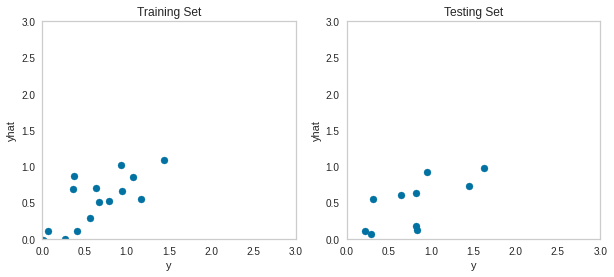

Training Metrics:
R squared: 0.71339382626468
Mean Absolute Error: 0.40178994051245787
Mean Squared Error: 0.2769707988811891
Root Mean Squared Error: 0.5262801524674753

Testing Metrics:
R squared: 0.7956382064100361
Mean Absolute Error: 0.37390467619653905
Mean Squared Error: 0.21664031412288717
Root Mean Squared Error: 0.4654463600919951


()

In [77]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

Train MSE median: 0.25399608281992136
Test MSE median: 0.3053548728028985

Train_R2 median: 0.7639737896153256
Test_R2 median: 0.5340213005700405


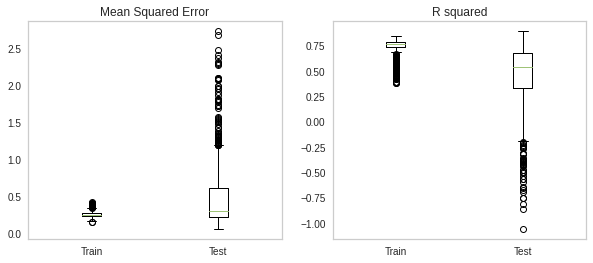

In [78]:
Multiple_Runner(LassoReg, X, y)

# Adjusted Data split 0.5 TOL 0.1

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5)
print(X_train.shape)
print(X_test.shape)

(27, 5)
(27, 5)


In [80]:
# CV = X train split
#LassoReg = LassoCV(cv = 16, random_state=1, tol =1).fit(X, y) 
# CV = X split
#LassoReg = LassoCV(cv = 27, random_state=1, tol =1).fit(X, y) 
LassoReg = LassoCV(cv = 43, random_state=1, tol = 0.1, n_alphas=5).fit(X, y) # CV = X split
LassoReg.alphas_[4]/LassoReg.alphas_[0]

0.0010000000000000002

In [81]:
LassoReg.score(X,y)

0.7420221315056837

In [82]:
y_pred_Train = LassoReg .predict(X_train) #Predictions on training model
y_pred_Test  = LassoReg .predict(X_test)  #Predictions on testing model

print('Intercept:',LassoReg .intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LassoReg .coef_)

Intercept: -214.4416518307065
Coefficients: [2.90912106e-04 2.38552145e-01 3.33747908e-01 2.70685982e-01
 8.69809663e-02]


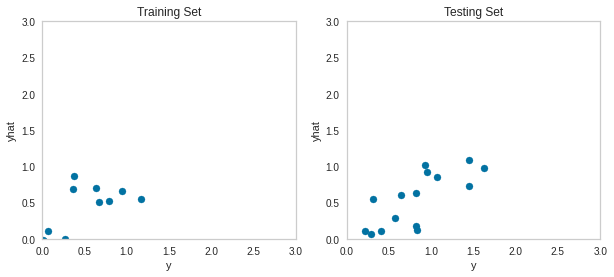

Training Metrics:
R squared: 0.7569219029309264
Mean Absolute Error: 0.40415170637983167
Mean Squared Error: 0.23414153155070294
Root Mean Squared Error: 0.4838817330202732

Testing Metrics:
R squared: 0.7085339837745398
Mean Absolute Error: 0.3818707860017278
Mean Squared Error: 0.2818142054379297
Root Mean Squared Error: 0.530861757369967


()

In [83]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)



Train MSE median: 0.2544997108466362
Test MSE median: 0.3234425512045344

Train_R2 median: 0.7624654555648429
Test_R2 median: 0.5481262455631568


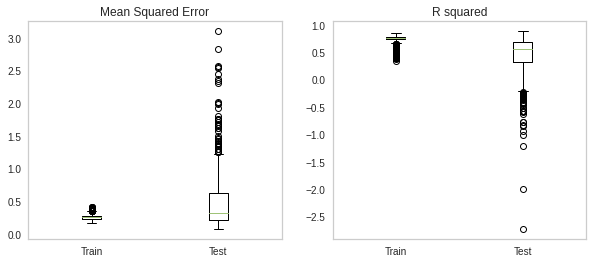

In [84]:
Multiple_Runner(LassoReg, X, y)

# AUGMENTED DATA

We drop the date column

Substitute Adjusted Qunatity. 

We multiply the dataframe a 1/10,ooo several times.

We devide by 1 / 10,ooo sevarla times

 

In [85]:
AUGMENTED_data = pd.read_csv('/content/Porcelana_OP_adelphi_2021_SCALED.csv')
AUGMENTED_data.head(2)

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,913190.407,194276.020,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.568,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,...,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.00,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.5,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25
1,2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1007968.299,228359.839,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.568,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,...,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.56,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.9,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24


In [86]:
 AUGMENTED_data = AUGMENTED_data[['Quantity', 'Seasonal', 'Gray_cement_dispatch_comercial', 'ISE',
       'Construction_lic_area/unt_SIlag_4', ]]

In [87]:
#Add new variable for ADJUSTED  Quantity
#This is the avg of previous Aprils

AUGMENTED_data["Quantity_adj"] = AUGMENTED_data['Quantity']
AUGMENTED_data.at[39,'Quantity_adj'] =  -1.303515
# Next drop the original Qunatity column
AUGMENTED_data.drop(columns='Quantity')

,Seasonal,Gray_cement_dispatch_comercial,ISE,Construction_lic_area/unt_SIlag_4,Quantity_adj
0,0.699923,502084.833000,102.548972,69.107759,1.503548
1,0.316156,530826.162500,102.919033,61.576356,0.076213
2,-0.267695,568447.488000,102.162670,57.195909,-1.346258
3,-2.419870,477863.756500,102.983586,60.038831,-2.122585
4,-0.644222,521968.220000,103.070062,63.974909,-0.665067
5,-0.938441,510880.730500,104.618991,58.587894,-1.108998
6,0.649509,562575.782000,103.420167,62.406190,0.294088
7,0.102205,540050.747000,103.913509,67.679245,-0.654309
8,0.483263,534357.191000,103.760403,67.535316,-0.880117
9,1.246427,542529.495500,103.870153,60.124903,-0.029225


In [88]:
AUGMENTED_data.shape

(54, 6)

## Augment the code Here

In [89]:
one = AUGMENTED_data*1.0001

Multiply the contents and save as a new df and stack them

In [90]:
frames = [one, AUGMENTED_data]
concated_data = pd.concat(frames)
concated_data.shape

(108, 6)

In [91]:
two = concated_data* 1.0001

In [92]:
frames = [two, concated_data]
concated_data = pd.concat(frames)
concated_data.shape

(216, 6)

In [93]:
three = concated_data * 1.001

In [94]:
frames = [three, concated_data]
concated_data = pd.concat(frames)
concated_data.shape

(432, 6)

In [95]:
four = concated_data* 0.99999

In [96]:
frames = [four, concated_data]
concated_data = pd.concat(frames)
concated_data.shape

(864, 6)

In [97]:
five = concated_data * 0.999999

In [98]:
frames = [five, concated_data]
concated_data = pd.concat(frames)
concated_data.shape

(1728, 6)

In [99]:
six = concated_data * 0.999999

In [100]:
frames = [six, concated_data]
concated_data = pd.concat(frames)
concated_data.shape

(3456, 6)

In [101]:
AUGMENTED_data = concated_data

In [102]:
y = AUGMENTED_data['Quantity_adj']
X = AUGMENTED_data.loc[: ,AUGMENTED_data.columns != 'Quantity_adj']

In [103]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [104]:
AUGMENTED_data[cols] = sc.fit_transform(AUGMENTED_data[cols])

In [105]:
AUGMENTED_data.shape

(3456, 6)

In [164]:
# export to csv for plotting

AUGMENTED_data.to_csv('AUGMENTED_data.csv')

In [106]:
y = AUGMENTED_data['Quantity_adj']
X = AUGMENTED_data.loc[: ,AUGMENTED_data.columns != 'Quantity_adj']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)

(2419, 5)
(1037, 5)


In [108]:
# CV = X train split
#LassoReg = LassoCV(cv = 16, random_state=1, tol =1).fit(X, y) 
# CV = X split
#LassoReg = LassoCV(cv = 27, random_state=1, tol =1).fit(X, y) 
LassoReg = LassoCV(cv = 43, random_state=1, tol = 0.01, n_alphas=5).fit(X, y) # CV = X split
LassoReg.alphas_[4]/LassoReg.alphas_[0]

0.0009999999999999998

In [109]:
LassoReg.score(X,y)

0.8849692629366414

In [110]:
y_pred_Train = LassoReg .predict(X_train) #Predictions on training model
y_pred_Test  = LassoReg .predict(X_test)  #Predictions on testing model

print('Intercept:',LassoReg .intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LassoReg .coef_)

Intercept: 0.01983065524480546
Coefficients: [ 0.99075884 -0.02111236 -0.18639906 -0.08639709 -0.01539287]


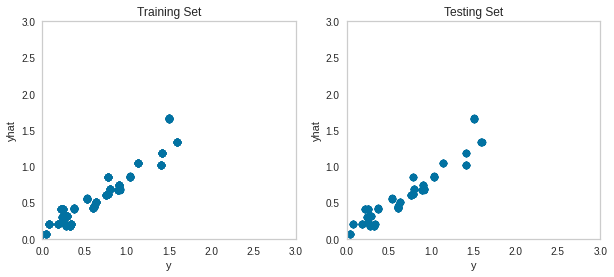

Training Metrics:
R squared: 0.8818738395051711
Mean Absolute Error: 0.17949292343926113
Mean Squared Error: 0.08319797504236319
Root Mean Squared Error: 0.2884405918770158

Testing Metrics:
R squared: 0.8922856557531198
Mean Absolute Error: 0.17540152676643916
Mean Squared Error: 0.07487193910330474
Root Mean Squared Error: 0.27362737272302406


()

In [111]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

Train MSE median: 0.08086452825507312
Test MSE median: 0.08019741684556139

Train_R2 median: 0.8848369717612674
Test_R2 median: 0.8851381336657558


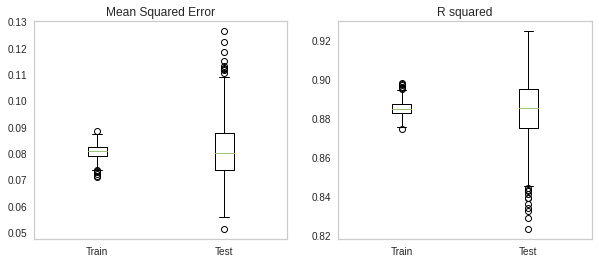

In [112]:
Multiple_Runner(LassoReg, X, y)

Augemented Split 0.5, TOL 0.01

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5)
print(X_train.shape)
print(X_test.shape)

(1728, 5)
(1728, 5)


In [114]:
1# CV = X train split
2 #LassoReg = LassoCV(cv = 16, random_state=1, tol =1).fit(X, y)
3 # CV = X split
4 #LassoReg = LassoCV(cv = 27, random_state=1, tol =1).fit(X, y)
LassoReg = LassoCV(cv = 43, random_state=1, tol = 0.01, n_alphas=5).fit(X, y) # CV = X 6 LassoReg.alphas_[4]/LassoReg.alphas_[0]

In [115]:
LassoReg.score(X,y)

0.8849692629366414

In [116]:
y_pred_Train = LassoReg .predict(X_train) #Predictions on training model
y_pred_Test = LassoReg .predict(X_test) #Predictions on testing model

print('Intercept:',LassoReg .intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LassoReg .coef_)

Intercept: 0.01983065524480546
Coefficients: [ 0.99075884 -0.02111236 -0.18639906 -0.08639709 -0.01539287]


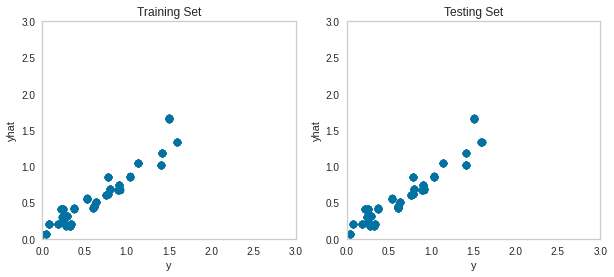

Training Metrics:
R squared: 0.8861611467037211
Mean Absolute Error: 0.17749031498005458
Mean Squared Error: 0.08114276679011857
Root Mean Squared Error: 0.28485569467735516

Testing Metrics:
R squared: 0.8836539054933705
Mean Absolute Error: 0.1790402203534929
Mean Squared Error: 0.0802565980696057
Root Mean Squared Error: 0.2832959549121831


()

In [117]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

Train MSE median: 0.080717374591889
Test MSE median: 0.08089140538239628

Train_R2 median: 0.8850836769531076
Test_R2 median: 0.8841991771203226


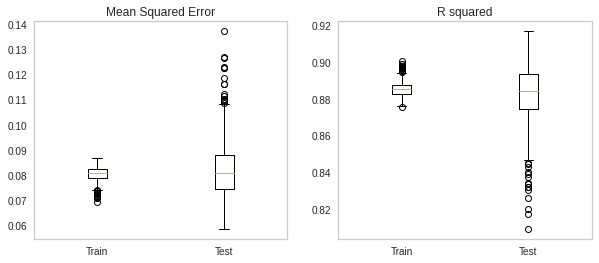

In [118]:
Multiple_Runner(LassoReg, X, y)

# AUGMENTED SPLIT 0.3 TOL = 0.1

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5)
print(X_train.shape)
print(X_test.shape)

(1728, 5)
(1728, 5)


In [120]:
1# CV = X train split
2 #LassoReg = LassoCV(cv = 16, random_state=1, tol =1).fit(X, y)
3 # CV = X split
4 #LassoReg = LassoCV(cv = 27, random_state=1, tol =1).fit(X, y)
LassoReg = LassoCV(cv = 43, random_state=1, tol = 0.1, n_alphas=5).fit(X, y) # CV = X 6 LassoReg.alphas_[4]/LassoReg.alphas_[0]
LassoReg.alphas_[4]/LassoReg.alphas_[0]

0.0009999999999999998

In [121]:
LassoReg.score(X,y)

0.8749085953591866

In [122]:
y_pred_Train = LassoReg .predict(X_train) #Predictions on training model
y_pred_Test = LassoReg .predict(X_test) #Predictions on testing model

print('Intercept:',LassoReg .intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LassoReg .coef_)

Intercept: 0.019830655244805536
Coefficients: [ 0.8360266  -0.00150868 -0.13376399 -0.02077738  0.01678898]


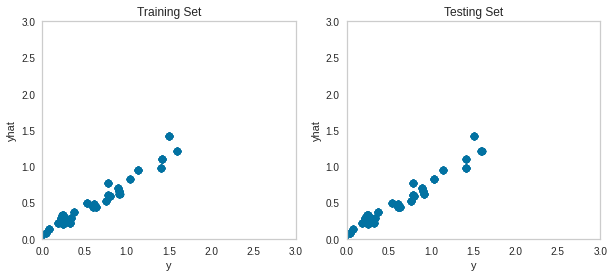

Training Metrics:
R squared: 0.8760339033136277
Mean Absolute Error: 0.1990400723219168
Mean Squared Error: 0.08836132640166362
Root Mean Squared Error: 0.29725633113806615

Testing Metrics:
R squared: 0.8736547044998164
Mean Absolute Error: 0.1998054970710637
Mean Squared Error: 0.08715413819383516
Root Mean Squared Error: 0.295218797155322


()

In [123]:

Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

Train MSE median: 0.08775783827958783
Test MSE median: 0.0878754072257206

Train_R2 median: 0.8749111718080564
Test_R2 median: 0.8746778435493543


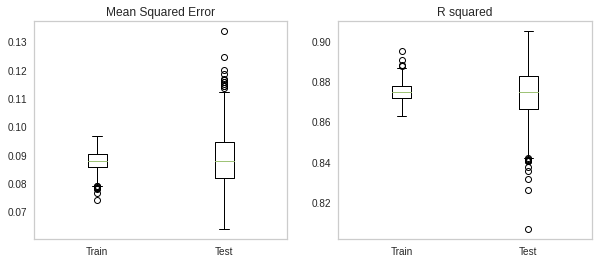

In [124]:
Multiple_Runner(LassoReg, X, y)

# Info compared

In [173]:
graph_data.describe()

,values
count,2.700000e+02
mean,1.542799e-15
std,1.001857e+00
min,-4.838342e+00
25%,-5.617130e-01
50%,1.117359e-01
75%,6.540659e-01
max,2.727047e+00


In [174]:
ADJUSTED_graph_data.describe()

,values
count,270.000000
mean,0.003964
std,0.971443
min,-4.838342
25%,-0.561713
50%,0.105971
75%,0.654066
max,2.727047


In [180]:
Augmented_graph_data.describe()

,values
count,17280.000000
mean,0.003966
std,0.969756
min,-4.839925
25%,-0.563156
50%,0.105963
75%,0.653807
max,2.739711


# Graphs

### Box Plot of Orig Data

In [137]:
graph_data = pd.read_csv('/content/data_Processed.csv')
graph_data.head(5)

,Unnamed: 0,date,Quantity,Seasonal,Gray_cement_dispatch_comercial,ISE,Construction_lic_area/unt_SIlag_4
0,0,736330,1.539880,0.703768,-0.536381,-0.687592,1.924774
1,1,736361,0.110421,0.325418,-0.137113,-0.608165,-0.287215
2,2,736389,-1.314169,-0.250193,0.385513,-0.770505,-1.573761
3,3,736420,-2.091651,-2.371991,-0.872854,-0.594309,-0.738789
4,4,736450,-0.631964,-0.621405,-0.260166,-0.575749,0.417245


In [138]:
graph_data = graph_data.drop(['date'], axis =1)

In [139]:
 # transpose the data....
 graph_data = Data_T = graph_data.T

In [141]:
 graph_data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
Unnamed: 0,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000,21.000000,22.000000,23.000000,24.000000,25.000000,26.000000,27.000000,28.000000,29.000000,30.000000,31.000000,32.000000,33.000000,34.000000,35.000000,36.000000,37.000000,38.000000,39.000000,40.000000,41.000000,42.000000,43.000000,44.000000,45.000000,46.000000,47.000000,48.000000,49.000000,50.000000,51.000000,52.000000,53.000000
Quantity,1.539880,0.110421,-1.314169,-2.091651,-0.631964,-1.076556,0.328619,-0.621189,-0.847334,0.004825,0.408204,-0.885702,0.251431,-0.446639,0.274410,-0.172390,0.284233,-0.819213,0.021083,0.283832,0.073638,0.312806,1.173166,0.216052,0.817616,-0.176434,-0.237667,-0.742230,-0.324085,-0.768374,0.638335,0.642891,0.817405,1.070975,0.932476,-0.184434,0.359528,0.567639,-1.136402,-4.184234,-1.580372,-0.655734,-0.091181,-0.755441,0.668642,1.630856,0.948835,0.794774,0.372061,0.938572,1.443736,0.833693,-0.469549,1.452310
Seasonal,0.703768,0.325418,-0.250193,-2.371991,-0.621405,-0.911472,0.654066,0.114487,0.490166,1.242559,1.374804,0.031261,0.703768,0.325418,-0.250193,-2.371991,-0.621405,-0.911472,0.654066,0.114487,0.490166,1.242559,1.374804,0.031261,0.703768,0.325418,-0.250193,-2.371991,-0.621405,-0.911472,0.654066,0.114487,0.490166,1.242559,1.374804,0.031261,0.703768,0.325418,-0.250193,-2.371991,-0.621405,-0.911472,0.654066,0.114487,0.490166,1.242559,1.374804,0.031261,0.703768,0.325418,-0.250193,-2.371991,-0.621405,-0.911472


In [142]:
# drop top row  called unnamed
graph_data = graph_data.iloc[1: , :]

In [143]:
 graph_data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
Quantity,1.539880,0.110421,-1.314169,-2.091651,-0.631964,-1.076556,0.328619,-0.621189,-0.847334,0.004825,0.408204,-0.885702,0.251431,-0.446639,0.274410,-0.172390,0.284233,-0.819213,0.021083,0.283832,0.073638,0.312806,1.173166,0.216052,0.817616,-0.176434,-0.237667,-0.742230,-0.324085,-0.768374,0.638335,0.642891,0.817405,1.070975,0.932476,-0.184434,0.359528,0.567639,-1.136402,-4.184234,-1.580372,-0.655734,-0.091181,-0.755441,0.668642,1.630856,0.948835,0.794774,0.372061,0.938572,1.443736,0.833693,-0.469549,1.452310
Seasonal,0.703768,0.325418,-0.250193,-2.371991,-0.621405,-0.911472,0.654066,0.114487,0.490166,1.242559,1.374804,0.031261,0.703768,0.325418,-0.250193,-2.371991,-0.621405,-0.911472,0.654066,0.114487,0.490166,1.242559,1.374804,0.031261,0.703768,0.325418,-0.250193,-2.371991,-0.621405,-0.911472,0.654066,0.114487,0.490166,1.242559,1.374804,0.031261,0.703768,0.325418,-0.250193,-2.371991,-0.621405,-0.911472,0.654066,0.114487,0.490166,1.242559,1.374804,0.031261,0.703768,0.325418,-0.250193,-2.371991,-0.621405,-0.911472
Gray_cement_dispatch_comercial,-0.536381,-0.137113,0.385513,-0.872854,-0.260166,-0.414190,0.303945,-0.008968,-0.088061,0.025467,0.041063,-0.273671,-0.547543,-0.566436,-0.254036,0.321601,-0.507460,-0.682682,-0.219398,0.290739,-0.054033,0.434834,0.370488,-0.111949,-0.478459,-0.621175,-0.046034,0.019071,0.000299,-0.424191,0.687016,0.601246,0.633319,0.548479,0.696113,0.745845,0.370128,-0.375876,-2.259184,-4.838342,-1.695356,-0.351152,1.229502,0.683176,1.169638,1.401052,1.277779,0.981664,0.489519,0.832945,1.731928,0.775629,-1.370725,0.947438


In [145]:
graph_data.reset_index(level=0, inplace=True)

In [146]:
graph_data
graph_data = pd.melt(graph_data,id_vars=['index'] , var_name= 'metric', value_name= 'values')

In [147]:
graph_data.head(3)

,index,metric,values
0,Quantity,0,1.539880
1,Seasonal,0,0.703768
2,Gray_cement_dispatch_comercial,0,-0.536381


In [153]:
import plotly.express as px
df = graph_data
fig = px.box(df, x="index", y="values",color = 'index',notched = True ,
             title=" Orig Data Features",
             hover_data=["index"])
fig.show()

In [ ]:
'''
ax = sns.boxplot(x="index", y="values", data= graph_data)
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
#plt.setp(ax.axis.get_majorticklabels(), ha='right',rotation = 30)
#ax.set_xticklabels(xticklabels, rotation = 45, ha="right")
ax.tick_params(axis='x',rotation=90)

### Box Plot of Adjusted data

In [160]:
ADJUSTED_graph_data = pd.read_csv('/content/ADJUSTED_data.csv')
ADJUSTED_graph_data.head(2)

,Unnamed: 0,date,Quantity,Seasonal,Gray_cement_dispatch_comercial,ISE,Construction_lic_area/unt_SIlag_4,Quantity_adj
0,0,736330,1.539880,0.703768,-0.536381,-0.687592,1.924774,1.503548
1,1,736361,0.110421,0.325418,-0.137113,-0.608165,-0.287215,0.076213


In [161]:
ADJUSTED_graph_data = ADJUSTED_graph_data.drop(['Quantity'], axis =1)

In [162]:
ADJUSTED_graph_data.head()

,Unnamed: 0,date,Seasonal,Gray_cement_dispatch_comercial,ISE,Construction_lic_area/unt_SIlag_4,Quantity_adj
0,0,736330,0.703768,-0.536381,-0.687592,1.924774,1.503548
1,1,736361,0.325418,-0.137113,-0.608165,-0.287215,0.076213
2,2,736389,-0.250193,0.385513,-0.770505,-1.573761,-1.346258
3,3,736420,-2.371991,-0.872854,-0.594309,-0.738789,-2.122585
4,4,736450,-0.621405,-0.260166,-0.575749,0.417245,-0.665067


In [163]:
ADJUSTED_graph_data = ADJUSTED_graph_data.drop(['date'], axis =1)

 # transpose the data....
ADJUSTED_graph_data =  ADJUSTED_graph_data.T

 # drop top row  called unnamed
ADJUSTED_graph_data = ADJUSTED_graph_data.iloc[1: , :]

ADJUSTED_graph_data.reset_index(level=0, inplace=True)

ADJUSTED_graph_data = pd.melt(ADJUSTED_graph_data,id_vars=['index'] , var_name= 'metric', value_name= 'values')

import plotly.express as px
df = ADJUSTED_graph_data
fig = px.box(df, x="index", y="values",color = 'index',notched = True ,
             title=" Adjusted Data Features",
             hover_data=["index"])
fig.show()

### Box Plot of Augmetned  data

In [177]:
#/content/AUGMENTED_data.csv
Augmented_graph_data = pd.read_csv('/content/AUGMENTED_data.csv')
Augmented_graph_data.head(2)

,Unnamed: 0,Quantity,Seasonal,Gray_cement_dispatch_comercial,ISE,Construction_lic_area/unt_SIlag_4,Quantity_adj
0,0,1.540774,0.704178,-0.532235,-0.674478,1.936743,1.505335
1,1,0.110466,0.325603,-0.132734,-0.595009,-0.276464,0.076304


In [178]:
Augmented_graph_data = Augmented_graph_data.drop(['Quantity'], axis =1)

In [179]:
#Augmented_graph_data = Augmented_graph_data.drop(['date'], axis =1)

 # transpose the data....
Augmented_graph_data =  Augmented_graph_data.T

 # drop top row  called unnamed
Augmented_graph_data = Augmented_graph_data.iloc[1: , :]

Augmented_graph_data.reset_index(level=0, inplace=True)

Augmented_graph_data = pd.melt(Augmented_graph_data,id_vars=['index'] , var_name= 'metric', value_name= 'values')

import plotly.express as px
df = Augmented_graph_data
fig = px.box(df, x="index", y="values",color = 'index',notched = True ,
             title=" Augmented Data Features",
             hover_data=["index"])
fig.show()